# Figure showing a single gas molecule bouncing off a cube wall.

Colin Ophus - 2024 Dec 19

In [1]:
import plotly.graph_objects as go

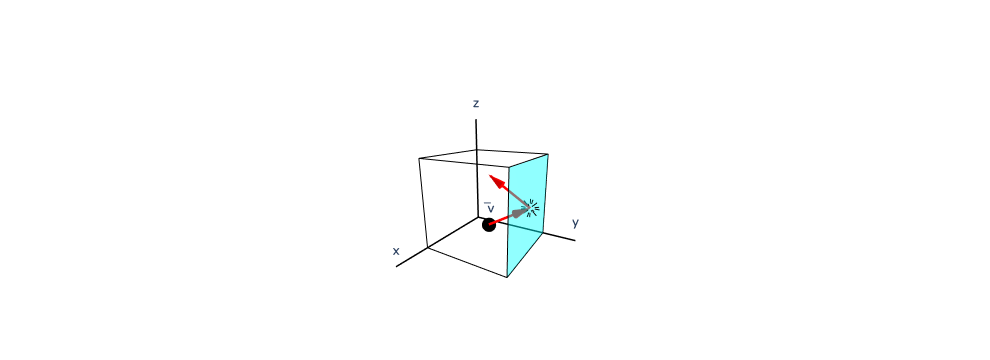

In [8]:
#| label: entropymolecule

# input variables
cube_size = 10
position = [5, 5, 2]  
# Vectors for velocity and reflected velocity
vector_incident = [0, 5, 3]  # Heading towards the right wall
vector_reflection = [0, -5, 3]  # Reflecting back from the wall

# Create the plot
fig = go.Figure()

# Cube edges
for x in (0, cube_size):
    fig.add_trace(go.Scatter3d(
        x=[x, x, x, x, x],
        y=[0, 0, cube_size, cube_size, 0],
        z=[0, cube_size, cube_size, 0, 0],
        mode='lines',
        line=dict(color='black', width=2),
    ))
for y in (0, cube_size):
    for z in (0, cube_size):
        fig.add_trace(go.Scatter3d(
            x=[0, cube_size],
            y=[y, y],
            z=[z, z],
            mode='lines',
            line=dict(color='black', width=2),
        ))

# Cube face
fig.add_trace(go.Mesh3d(
    x=[0, cube_size, cube_size, 0],
    y=[cube_size, cube_size, cube_size, cube_size],
    z=[0, 0, cube_size, cube_size],
    i=[0, 1, 2, 3],  # Define indices for the vertices to form a face
    j=[1, 2, 3, 0],
    k=[2, 3, 0, 1],
    # color='rgb(0,0.7,1.0)',
    color='cyan',
    opacity=0.25,
    name='Cube Face'
))

#  gas molecule
fig.add_trace(go.Scatter3d(
    x=[position[0]],
    y=[position[1]],
    z=[position[2]],
    mode='markers+text',
    marker=dict(size=8, color='black'),
    text=['\u0305v'],  # Unicode for overline (velocity symbol)
    textposition='top center',
    name='Gas Molecule'
))

# Add incident vector as a line with cone arrow
fig.add_trace(go.Scatter3d(
    x=[position[0], position[0] + vector_incident[0]*0.95],
    y=[position[1], position[1] + vector_incident[1]*0.95],
    z=[position[2], position[2] + vector_incident[2]*0.95],
    mode='lines',
    line=dict(color='red', width=5),
    name='Incident Vector'
))
fig.add_trace(go.Cone(
    x=[position[0] + vector_incident[0]],
    y=[position[1] + vector_incident[1]],
    z=[position[2] + vector_incident[2]],
    u=[vector_incident[0]],
    v=[vector_incident[1]],
    w=[vector_incident[2]],
    sizemode='absolute',
    sizeref=2,
    anchor='tip',
    name='Incident Arrow',
    showscale=False,
    colorscale=[[0, 'red'], [1, 'red']]
))

# Add reflection vector as a line with cone arrow
fig.add_trace(go.Scatter3d(
    x=[position[0] + vector_incident[0], position[0] + vector_incident[0] + vector_reflection[0]*0.95],
    y=[position[1] + vector_incident[1], position[1] + vector_incident[1] + vector_reflection[1]*0.95],
    z=[position[2] + vector_incident[2], position[2] + vector_incident[2] + vector_reflection[2]*0.95],
    mode='lines',
    line=dict(color='red', width=5),
    name='Incident Vector'
))
fig.add_trace(go.Cone(
    x=[position[0] + vector_incident[0] + vector_reflection[0]],
    y=[position[1] + vector_incident[1] + vector_reflection[1]],
    z=[position[2] + vector_incident[2] + vector_reflection[2]],
    u=[vector_reflection[0]],
    v=[vector_reflection[1]],
    w=[vector_reflection[2]],
    sizemode='absolute',
    sizeref=2,
    anchor='tip',
    name='Incident Arrow',
    showscale=False,
    colorscale=[[0, 'red'], [1, 'red']]
))

# Add x, y, z axes
extend = 4
fig.add_trace(go.Scatter3d(
    x=[0, cube_size+extend], y=[0, 0], z=[0, 0], 
    mode='lines+text',
    line=dict(color='black', width=3),
    text=['', 'x'], 
    textposition='top center',
    name='X-axis'
))
fig.add_trace(go.Scatter3d(
    x=[0, 0], y=[0, cube_size+extend], z=[0, 0], 
    mode='lines+text',
    line=dict(color='black', width=3),
    text=['', 'y'], 
    textposition='top center',
    name='Y-axis'
))
fig.add_trace(go.Scatter3d(
    x=[0, 0], y=[0, 0], z=[0, cube_size+extend], 
    mode='lines+text',
    line=dict(color='black', width=3),
    text=['', 'z'], 
    textposition='top center',
    name='Z-axis'
))

# Add "starburst" at collision point
collision_point = [position[0] + vector_incident[0], position[1] + vector_incident[1], position[2] + vector_incident[2]]
burst_length = (0.5,1)  # Adjust length of starburst rays
# Directions for the 8 rays (diagonals included)
s = 0.707
directions = [
    (-1, 0, 0), (1, 0, 0),  # ±x
    (0, -1, 0), (0, 1, 0),  # ±y
    (0, 0, -1), (0, 0, 1),  # ±z
    (s, s, 0), (-s, -s, 0), 
    (s, 0, s), (-s, 0, -s), 
    (0, s, s), (0, -s, -s), 
    (s, -s, 0), (-s, s, 0), 
    (s, 0, -s), (-s, 0, s), 
    (0, s, -s), (0, -s, s), 
]

# Add rays
for dx, dy, dz in directions:
    fig.add_trace(go.Scatter3d(
        x=[collision_point[0] + dx * burst_length[0], collision_point[0] + dx * burst_length[1]],
        y=[collision_point[1] + dy * burst_length[0], collision_point[1] + dy * burst_length[1]],
        z=[collision_point[2] + dz * burst_length[0], collision_point[2] + dz * burst_length[1]],
        mode='lines',
        line=dict(color='black', width=2),
    ))

# # Add "starburst" at collision point
# collision_point = [position[0] + vector_incident[0], position[1] + vector_incident[1], position[2] + vector_incident[2]]
# burst_length = 2  # Adjust length of starburst rays

# for dx, dy, dz in [(-1, 0, 0), (1, 0, 0), (0, -1, 0), (0, 1, 0), (0, 0, -1), (0, 0, 1)]:
#     fig.add_trace(go.Scatter3d(
#         x=[collision_point[0], collision_point[0] + dx * burst_length],
#         y=[collision_point[1], collision_point[1] + dy * burst_length],
#         z=[collision_point[2], collision_point[2] + dz * burst_length],
#         mode='lines',
#         line=dict(color='yellow', width=2),
#         name='Starburst'
#     ))


# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='', showticklabels=False, showgrid=False, showbackground=False),
        yaxis=dict(title='', showticklabels=False, showgrid=False, showbackground=False),
        zaxis=dict(title='', showticklabels=False, showgrid=False, showbackground=False),
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='cube',
        camera=dict(
            eye=dict(x=1.2, y=0.7, z=0.4)  # Adjusting the perspective
        )
    ),
    showlegend=False
)

# Show the plot
fig.show()


In [ ]:
!